# K-Means CLustering

In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## 1. k-means on a Randomly Generated Dataset

In [8]:
# data
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]
centers = [[-2, 2], [2, -2]]
print('Datapoints defined!')

Datapoints defined!


In [6]:
print(pd.DataFrame(x1).head())

     0
0 -4.9
1 -3.5
2  0.0
3 -4.5
4 -3.0


### Define a function that assigns each datapoint to a cluster

In [28]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center 
    colors = colors_map[class_of_points + 1 - 1]
    return colors , class_of_points

print('assign members function defined!')

assign members function defined!


In [40]:
print(np.unique(class_of_points, return_counts=True))

def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return center1, center2
    print(center1, center2)
    
print('assign_members function updated!')

(array([False,  True]), array([17, 13], dtype=int64))
assign_members function updated!


### Define a function that plots the data points along with the cluster centroids

In [58]:
# centroids=None
# colors='g'
def plot_points(centroid=None, colors='g', figure_title=None):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)

    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroid_colors):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=100, c=colors)

    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 8, 15, endpoint=True)

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)

    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)

    ax.set_title('Distribution of points', fontsize=24)
    plt.show()

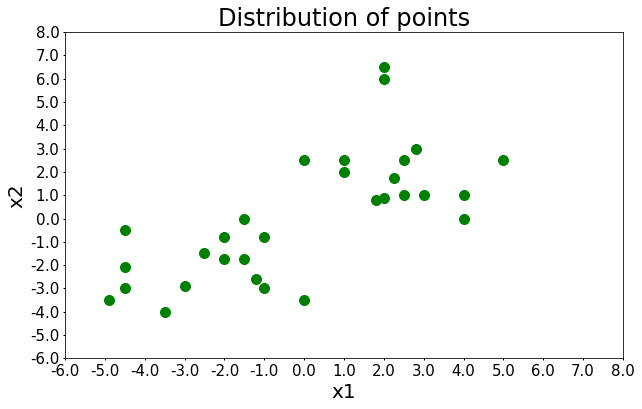

In [59]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

### Initialize k-means - randomly define clusters and add them to plot

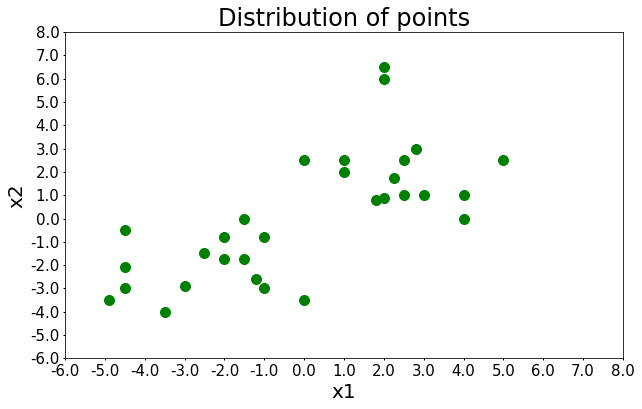

In [60]:
centers = [[-2, 2], [2, -2]]
plot_points(centers, figure_title='k-means Initialization')

### Run k-means (4-iterations only)

Iteration 1 - Press Enter to update the members of each cluster


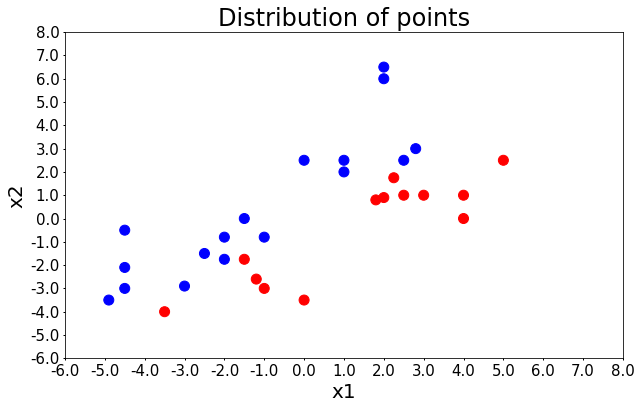

Iteration 1 - Press Enter to update the centers


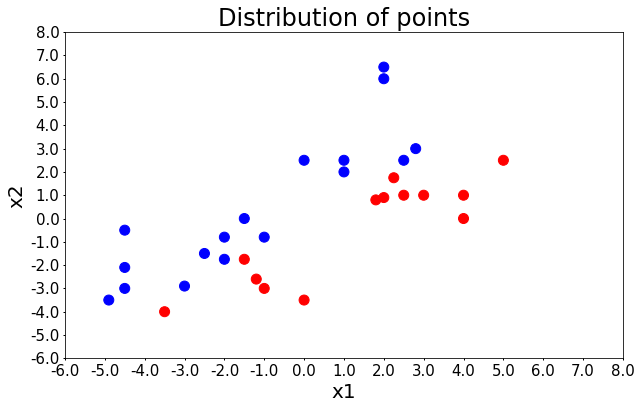

Iteration 2 - Press Enter to update the members of each cluster


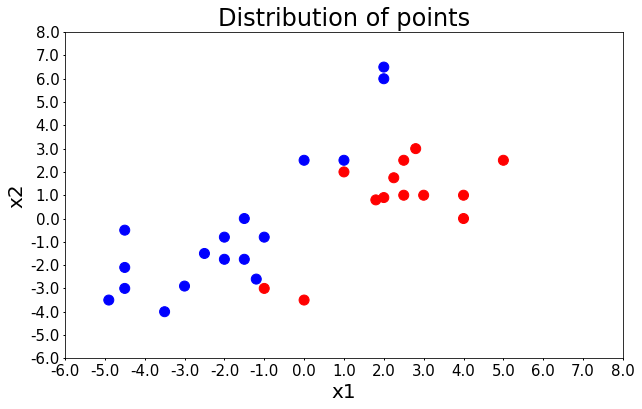

Iteration 2 - Press Enter to update the centers


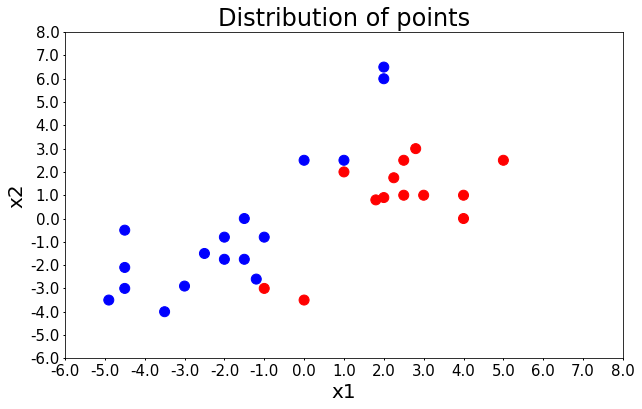

Iteration 3 - Press Enter to update the members of each cluster


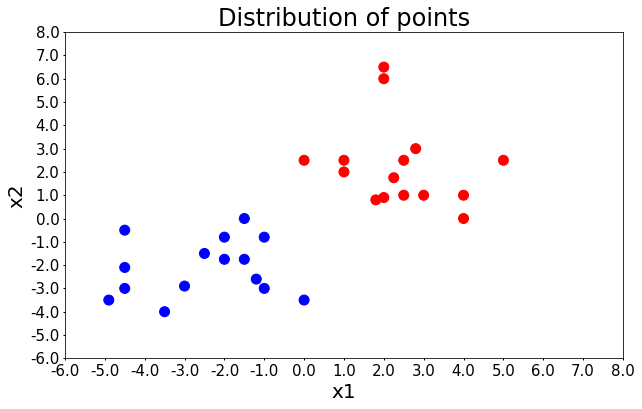

Iteration 3 - Press Enter to update the centers


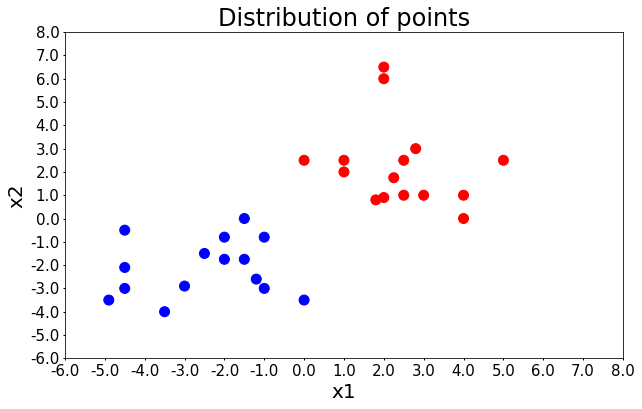

Iteration 4 - Press Enter to update the members of each cluster


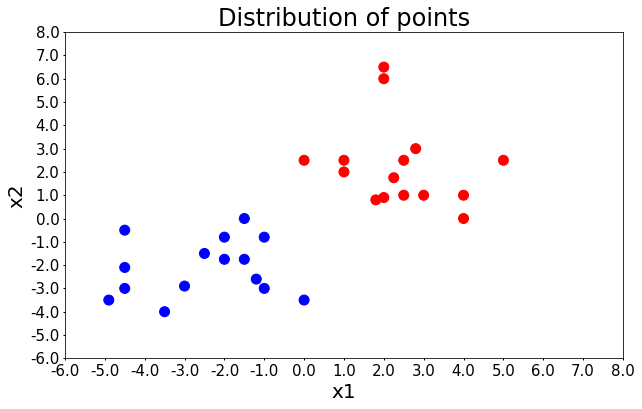

Iteration 4 - Press Enter to update the centers


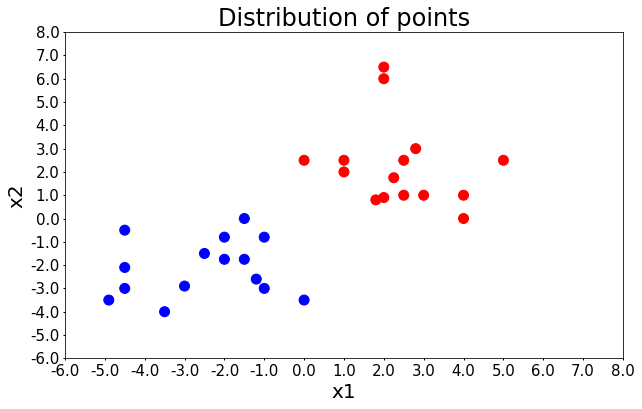

In [61]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

### Generating the Data

First, we need to set up a random seed. We use the Numpy's random.seed() function, and we will set the seed to 0. In other words, random.seed(0)

In [62]:
np.random.seed(0)

In [64]:
X, y = make_blobs(n_samples = 5000, centers = [[4,4], [-2, -1], [1, 1], [-3, 2]], cluster_std = 0.9)
X[0:5]

array([[-1.84404118, -0.28877401],
       [-3.60739432,  0.08772576],
       [-3.07008574,  1.47851945],
       [-3.38705186,  1.24250874],
       [-1.11628948,  0.87437692]])

In [67]:
y[0:20]

array([1, 1, 3, 3, 1, 1, 0, 3, 0, 0, 1, 0, 2, 1, 3, 0, 2, 3, 1, 2])

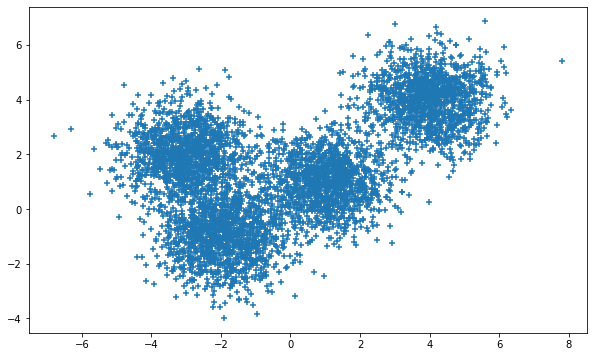

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0] , X[:,1], marker = '+')

In [73]:
kmeans = KMeans(init='k-means++', n_clusters = 4, n_init=12)
kmeans

KMeans(n_clusters=4, n_init=12)

In [74]:
kmeans.fit(X)

KMeans(n_clusters=4, n_init=12)

In [77]:
kmeans_labels = kmeans.labels_

In [78]:
kmeans_cluster_centers = kmeans.cluster_centers_
print(kmeans_labels)
print(kmeans_cluster_centers)

[2 1 1 ... 1 0 3]
[[ 3.99727538  3.99358186]
 [-3.01605556  2.03462699]
 [-1.92166699 -1.06550229]
 [ 1.02996113  0.99444937]]


### Visualizing the Resulting Clusters

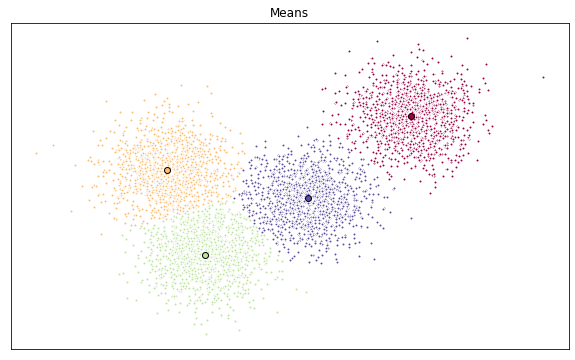

In [85]:
centers = [[4,4], [-2, -1], [1, 1], [-3, 2]]
fig = plt.figure(figsize=(10, 6))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans_labels))))
colors

ax = fig.add_subplot(1, 1, 1)


for k, col in zip(range(len(centers)), colors):
    my_members = (kmeans_labels == k)
    cluster_center = kmeans_cluster_centers[k]
    
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor = col, marker = '.')
    
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize=6)

ax.set_title('Means')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

## 2. Using k-means for Customer Segmentation

In [86]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/customer_segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [87]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [95]:
## Noramlize the data

from sklearn.preprocessing import StandardScaler

X = df.values[:, 1:]
X = np.nan_to_num(X)
cluster_x = StandardScaler().fit(X).transform(X)
# Alternate method of writing
# cluster_x = StandardScaler().fit_transform(X) 
cluster_x[0:5]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653]])

In [96]:
kmeans = KMeans(init = 'k-means++', n_clusters=3, n_init=12)
kmeans.fit(cluster_x)
kmeans_labels = kmeans.labels_
kmeans_cluster_center = kmeans.cluster_centers_

kmeans_labels
kmeans_cluster_center

array([[ 9.91773769e-01,  2.38756999e-01,  1.27421461e+00,
         1.43518566e+00,  1.24440502e+00,  1.43538377e+00,
        -2.09335587e-01,  5.57517111e-01],
       [-1.50796609e-01, -1.15651304e-01, -1.38795179e-01,
        -2.73411279e-01, -3.40626044e-01, -3.71502176e-01,
        -5.23796543e-01, -3.28592133e-01],
       [-3.90439547e-01,  1.62695612e-01, -6.79376729e-01,
        -3.86448408e-01, -6.83901553e-05, -6.93056978e-02,
         1.87982575e+00,  5.69270845e-01]])

In [98]:
df['Labels'] = kmeans_labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [99]:
df.groupby('Labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
